# The Spark Foundation task - 8


### GRIP

### Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) 

### Use animation, timeline and annotations to create attractive and interactive dashboards and story

### Identify interesting patterns and possible reasons helping Covid-19 spread  with basic as well as advanced charts.

### Dataset: Daily updated .csv file on https://bit.ly/30d2gdi



#### Author - Ankit Dhaka

In [1]:
# All basic required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

In [2]:
#importing our dataset from local machine

df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
#Take a look of dataset from below

df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
122170,ZWE,Africa,Zimbabwe,2021-10-04,131129.0,0.0,172.857,4627.0,0.0,2.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122171,ZWE,Africa,Zimbabwe,2021-10-05,131205.0,76.0,133.286,4627.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122172,ZWE,Africa,Zimbabwe,2021-10-06,131434.0,229.0,135.571,4630.0,3.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122173,ZWE,Africa,Zimbabwe,2021-10-07,131523.0,89.0,100.429,4631.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122174,ZWE,Africa,Zimbabwe,2021-10-08,131705.0,182.0,96.714,4634.0,3.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df.shape  #shape of our data

(122175, 65)

In [5]:
df.columns # all the columns inside the dataset

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
df.info() # overall information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122175 entries, 0 to 122174
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 122175 non-null  object 
 1   continent                                116615 non-null  object 
 2   location                                 122175 non-null  object 
 3   date                                     122175 non-null  object 
 4   total_cases                              115922 non-null  float64
 5   new_cases                                115918 non-null  float64
 6   new_cases_smoothed                       114904 non-null  float64
 7   total_deaths                             105098 non-null  float64
 8   new_deaths                               105251 non-null  float64
 9   new_deaths_smoothed                      114904 non-null  float64
 10  total_cases_per_million         

In [7]:
#basic statisical details 
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.159220e+05,115918.000000,114904.000000,1.050980e+05,105251.000000,114904.000000,115312.000000,115308.000000,114299.000000,104501.000000,...,84368.000000,83144.000000,54301.000000,98249.000000,115867.000000,108166.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,1.450611e+06,6457.862178,6477.623327,3.668938e+04,144.934366,132.102788,17961.002088,83.764739,83.752691,374.974706,...,10.591830,32.739943,50.735852,3.023216,73.260029,0.726455,28164.447617,8.037462,15.032927,693.873443
std,9.703447e+06,39316.402581,38913.647433,2.185803e+05,789.920402,739.475163,30498.232211,195.084057,164.137417,632.881059,...,10.504497,13.506306,31.752919,2.452696,7.539987,0.150210,82695.599668,15.932903,31.102516,1098.524489
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.016250e+03,3.000000,9.286000,6.900000e+01,0.000000,0.000000,352.003750,0.285000,1.556000,10.305000,...,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,-265.500000,-1.437500,-1.427500,-58.952356
50%,2.100300e+04,93.000000,115.429000,6.060000e+02,2.000000,1.714000,2752.912000,10.733000,14.808000,69.391000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,1266.100000,4.355000,5.670000,242.865156
75%,2.161240e+05,928.000000,980.178750,5.243750e+03,19.000000,15.857000,21791.958500,81.623750,91.060000,454.937000,...,19.300000,41.100000,82.502000,3.861000,78.740000,0.848000,17289.675000,12.907500,21.155000,1159.448112
max,2.372493e+08,905948.000000,826439.429000,4.842788e+06,17977.000000,14722.857000,219654.231000,8620.690000,3385.473000,5984.278000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,693243.800000,106.830000,373.280000,6098.955872


In [8]:
df.count() #Used to count the number of rows

iso_code                                   122175
continent                                  116615
location                                   122175
date                                       122175
total_cases                                115922
                                            ...  
human_development_index                    108166
excess_mortality_cumulative_absolute         4322
excess_mortality_cumulative                  4322
excess_mortality                             4322
excess_mortality_cumulative_per_million      4322
Length: 65, dtype: int64

In [9]:
duplicate_df = df[df.duplicated()] # this is way to check duplicate values

print("Number of duplicate rows: ", duplicate_df.shape)

Number of duplicate rows:  (0, 65)


In [10]:
df = df.drop_duplicates() # drop duplicate values

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum() # checking the null values

iso_code                                        0
continent                                    5560
location                                        0
date                                            0
total_cases                                  6253
                                            ...  
human_development_index                     14009
excess_mortality_cumulative_absolute       117853
excess_mortality_cumulative                117853
excess_mortality                           117853
excess_mortality_cumulative_per_million    117853
Length: 65, dtype: int64

### Data visualization & Analysis report

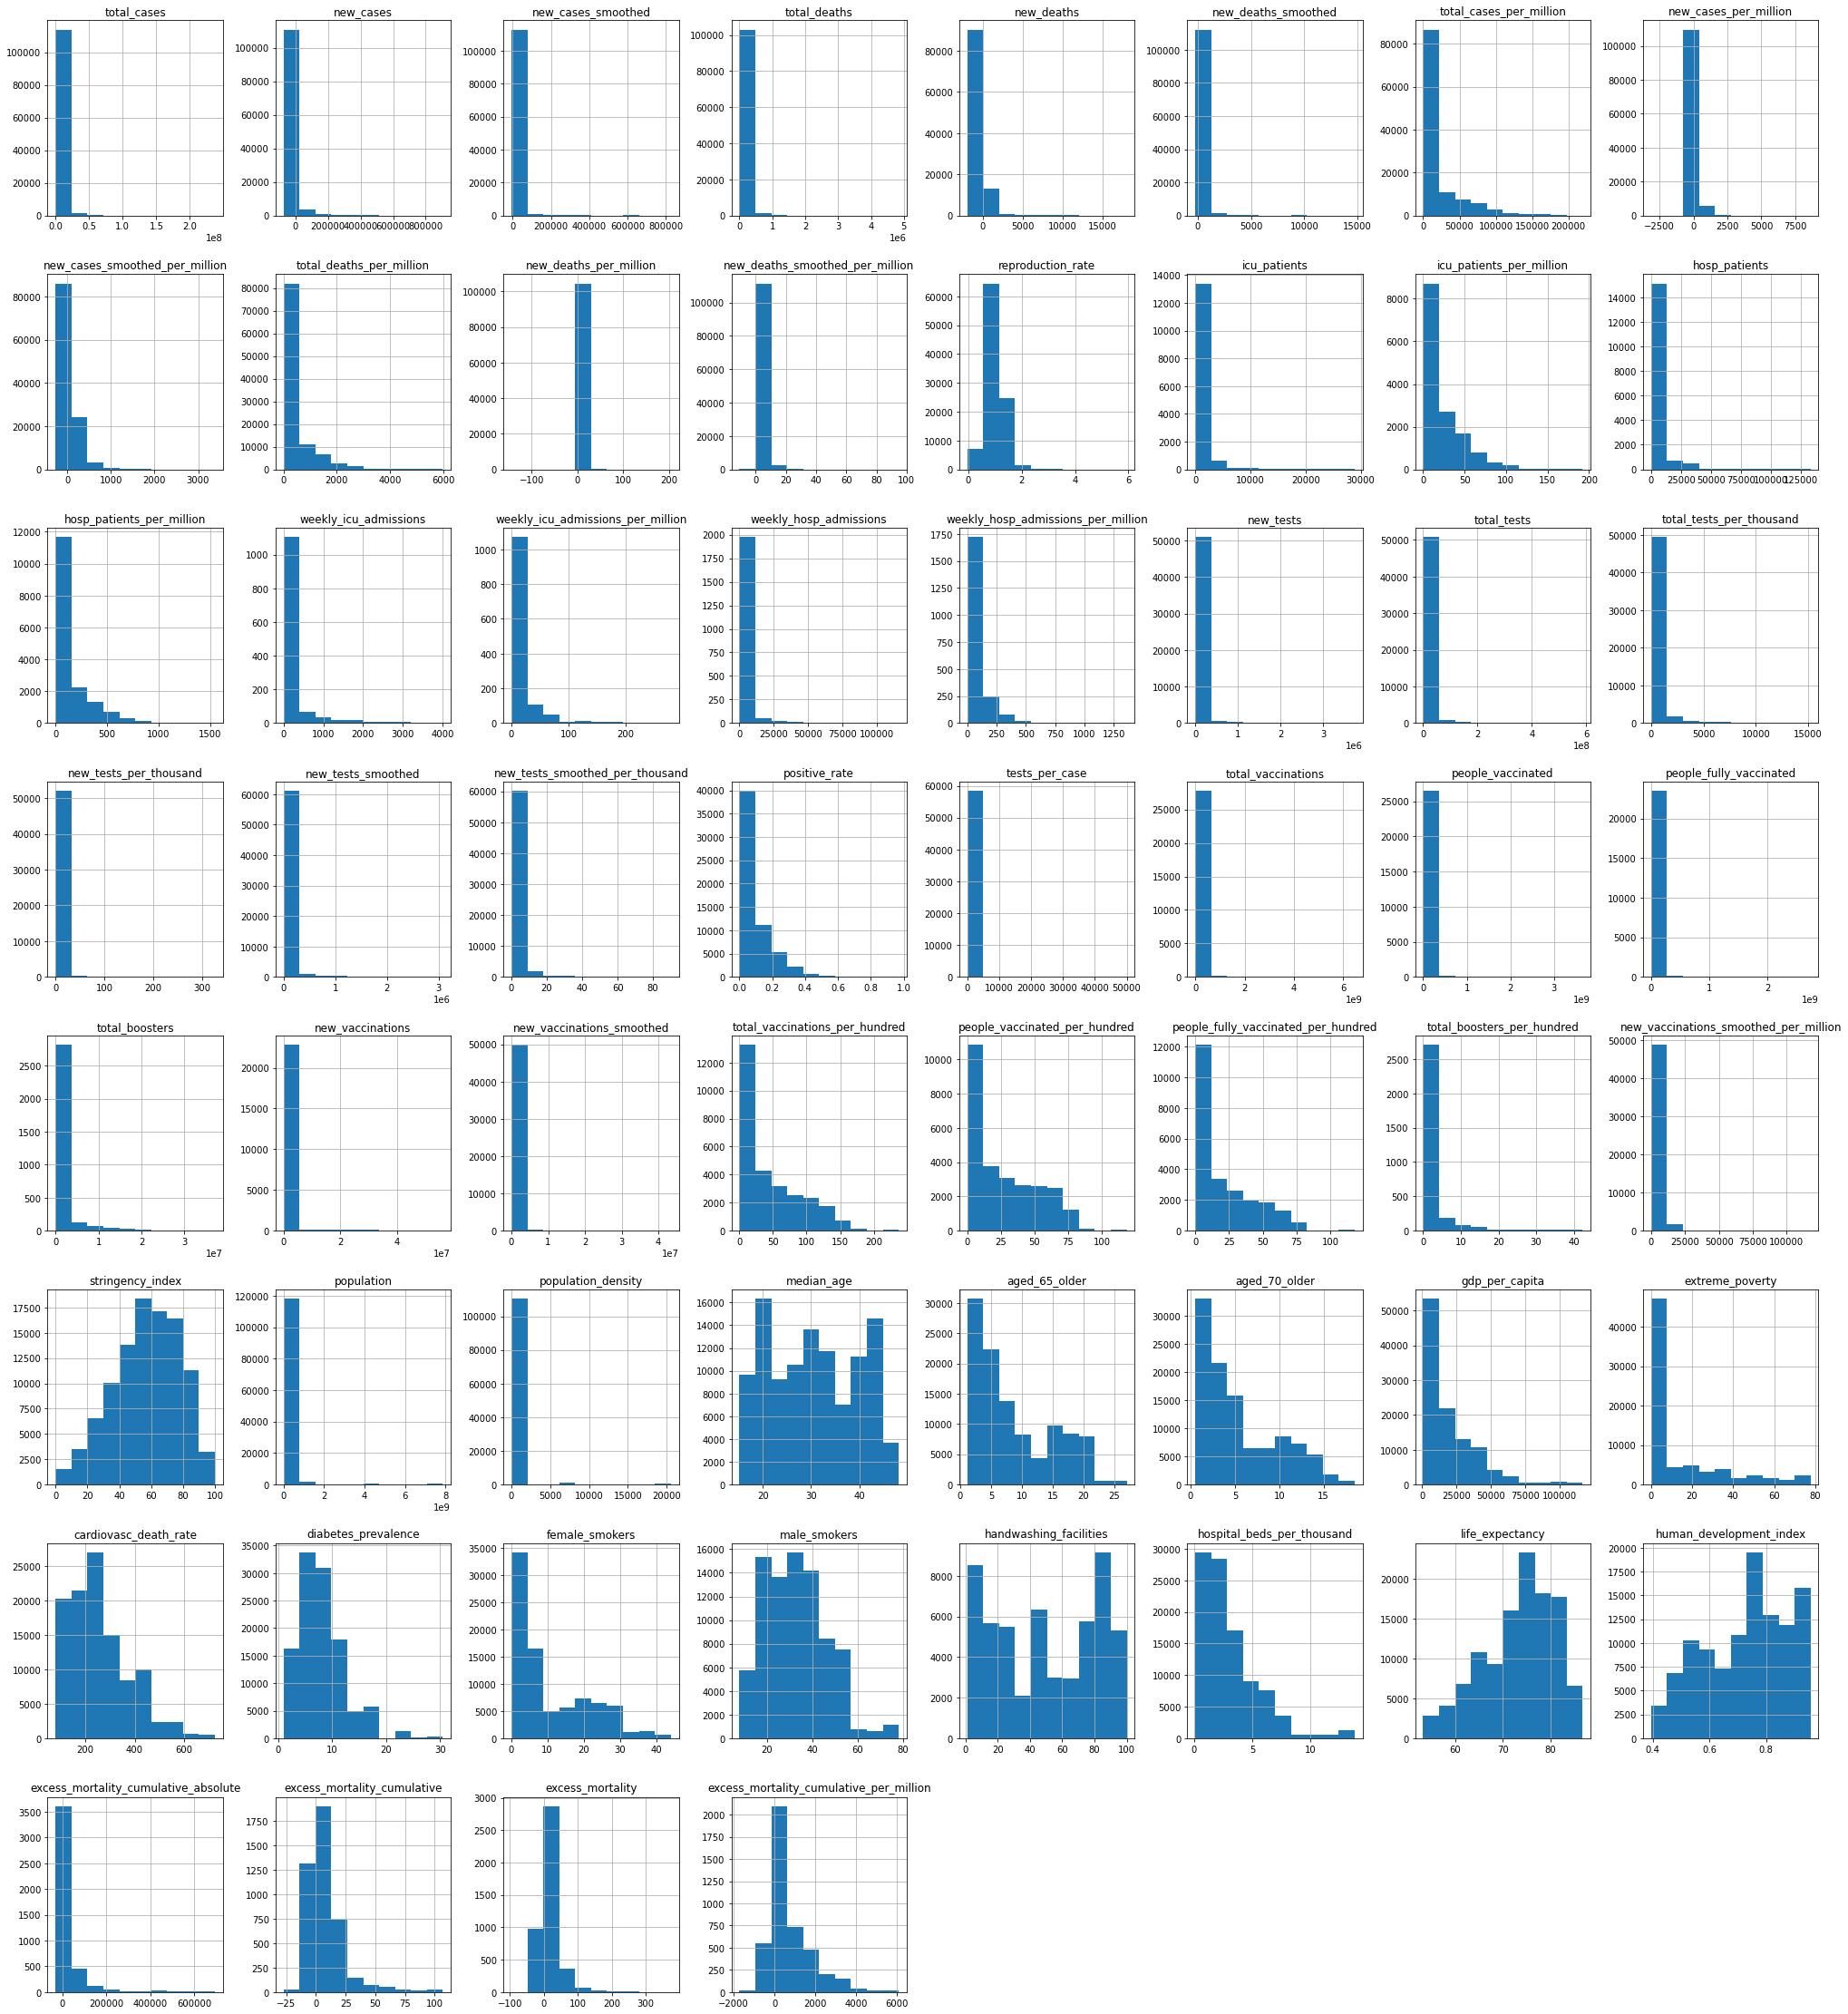

In [12]:
#using histogram to represent the relationship between all features

df.hist(figsize=(35,40))
plt.show()

In [29]:
# Most effected continent

df['continent'].value_counts()

Africa           30973
Europe           28626
Asia             28439
North America    15729
South America     7172
Oceania           5676
Name: continent, dtype: int64

In [65]:
top_10_countries_by_most_deaths = df.sort_values("total_deaths",ascending =False)
top_10_countries_by_most_deaths ['location'].tail(10)

121045      Zambia
121046      Zambia
121047      Zambia
121048      Zambia
121049      Zambia
121050      Zambia
121051      Zambia
121607    Zimbabwe
121608    Zimbabwe
121609    Zimbabwe
Name: location, dtype: object

In [14]:
last_cases = df[df["date"] == "2021-10-08"] # to check the last day casesof each country 
last_cases.head() # to print only first five

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
592,AFG,Asia,Afghanistan,2021-10-08,155448.0,19.0,36.714,7221.0,0.0,2.143,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
1196,OWID_AFR,NaN,Africa,2021-10-08,8380407.0,6108.0,7483.143,213531.0,319.0,276.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1788,ALB,Europe,Albania,2021-10-08,174168.0,445.0,484.286,2753.0,7.0,6.857,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
2380,DZA,Africa,Algeria,2021-10-08,204388.0,112.0,124.429,5846.0,3.0,4.429,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
2966,AND,Europe,Andorra,2021-10-08,15291.0,3.0,9.857,130.0,0.0,0.000,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN


In [15]:
max_cases = last_cases.sort_values(by = "total_cases" , ascending = False) # this is the last day max cases of each country
max_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120489,OWID_WRL,NaN,World,2021-10-08,237249329.0,478664.0,419058.000,4842788.0,8249.0,7211.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
6403,OWID_ASI,NaN,Asia,2021-10-08,76889805.0,138062.0,131541.571,1140531.0,1827.0,1704.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37356,OWID_EUR,NaN,Europe,2021-10-08,60551949.0,155504.0,139223.857,1245000.0,2328.0,2115.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81396,OWID_NAM,NaN,North America,2021-10-08,53271010.0,151037.0,116268.000,1081518.0,3206.0,2493.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116404,USA,North America,United States,2021-10-08,44290052.0,131142.0,95917.857,712693.0,2520.0,1741.714,...,19.100,24.600,NaN,2.770,78.86,0.926,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27980,CUW,North America,Curacao,2021-10-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.88,NaN,NaN,NaN,NaN,NaN
38234,FRO,Europe,Faeroe Islands,2021-10-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.67,NaN,NaN,NaN,NaN,NaN
43614,GIB,Europe,Gibraltar,2021-10-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.93,NaN,NaN,NaN,NaN,NaN
44467,GRL,North America,Greenland,2021-10-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,71.70,NaN,NaN,NaN,NaN,NaN


In [16]:
max_cases[1:6]  # Top 5 Countries of having maximum cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6403,OWID_ASI,NaN,Asia,2021-10-08,76889805.0,138062.0,131541.571,1140531.0,1827.0,1704.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37356,OWID_EUR,NaN,Europe,2021-10-08,60551949.0,155504.0,139223.857,1245000.0,2328.0,2115.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81396,OWID_NAM,NaN,North America,2021-10-08,53271010.0,151037.0,116268.000,1081518.0,3206.0,2493.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116404,USA,North America,United States,2021-10-08,44290052.0,131142.0,95917.857,712693.0,2520.0,1741.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
37981,OWID_EUN,NaN,European Union,2021-10-08,38363236.0,63469.0,54482.571,776919.0,870.0,705.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


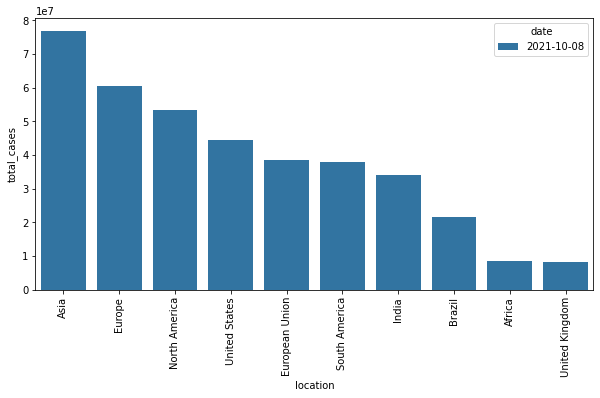

In [17]:
plt.figure(figsize=(10,5))  #bar plot of first  10 countries having maximum cases
sns.barplot(x = 'location' , y = 'total_cases' , data = max_cases[1:11] , hue = 'date')
plt.xticks(rotation=90)
#plt.style.use('dark_background')
plt.show()

### Analysis of COVID Cases in Asia

In [18]:
data_asia = df[df['continent'] =='Asia']
data_asia = data_asia[~data_asia['location'].isin(['World','International'])]
data_asia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [19]:
df_asia=data_asia[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
0,2020-02-24,5.0,5.0,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN


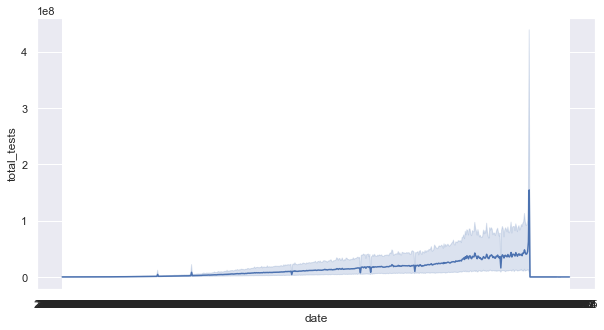

In [20]:
# Total Test per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "total_tests" , data = df_asia)
plt.show()

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

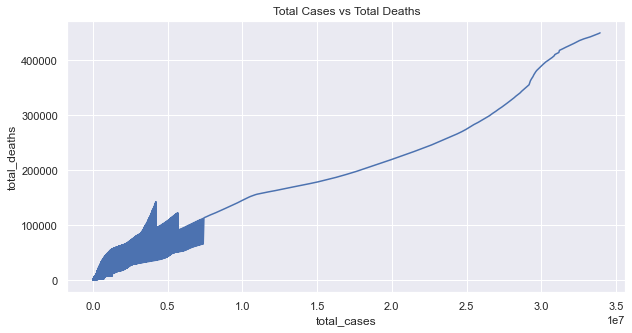

In [67]:

plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=df_asia)
plt.title("Total Cases vs Total Deaths")

#### From the above graph we can say that as the total cases increases the total deaths are also increasing.

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

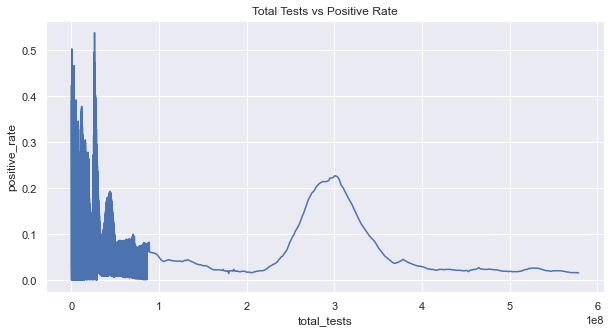

In [61]:
plt.figure(figsize=(10,5)) # total tests vs positive rate
sns.lineplot(x='total_tests',y='positive_rate',data=df_asia)
plt.title("Total Tests vs Positive Rate")

#### From the above line graph we can say that, in the beginning as the number of tests were being done the positive rate also had increased but it decreased after around 1 le8 and after that it has been gradualy increasing.

Text(0.5, 1.0, 'Total Deaths vs New Deaths per million')

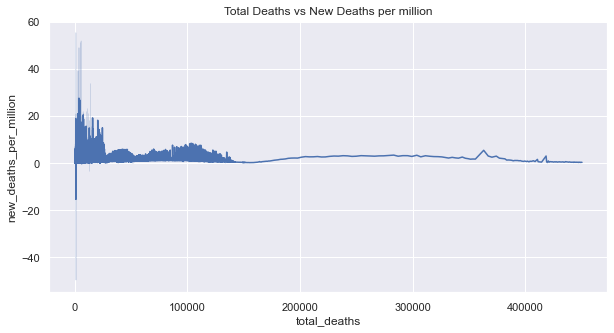

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_deaths',y='new_deaths_per_million',data=df_asia)
plt.title("Total Deaths vs New Deaths per million")

#### From the above graph we can say that, new deaths per million population had increased very steeply in the beginning. Around 4000 cases approximately number of deaths started increasing slowly and after 41000 deaths approximately it started falling.

<AxesSubplot:>

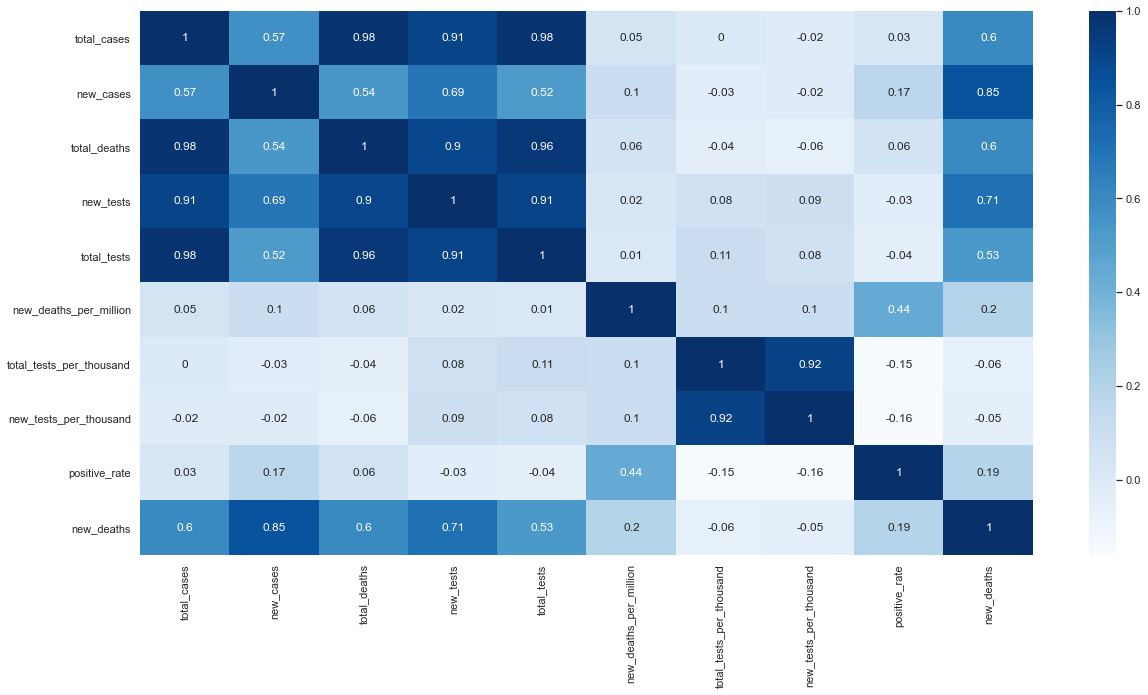

In [21]:
plt.figure(figsize= (20,10)) #Heatmap Showing Correlation of dataset
sns.heatmap(np.round(df_asia.corr(),2),annot= True,cmap='Blues')

#### India

In [22]:
# Covid Cases in INDIA
india = df[df["location"] == "India"]
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50549,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
50550,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
50551,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
50552,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
50553,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [23]:
india.tail() # last 5 rows of the dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
51162,IND,Asia,India,2021-10-04,33853048.0,18346.0,22209.571,449260.0,263.0,269.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
51163,IND,Asia,India,2021-10-05,33871881.0,18833.0,22204.286,449538.0,278.0,255.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
51164,IND,Asia,India,2021-10-06,33894312.0,22431.0,22047.429,449856.0,318.0,256.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
51165,IND,Asia,India,2021-10-07,33915569.0,21257.0,21266.000,450127.0,271.0,255.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
51166,IND,Asia,India,2021-10-08,33935309.0,19740.0,20606.857,450375.0,248.0,257.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


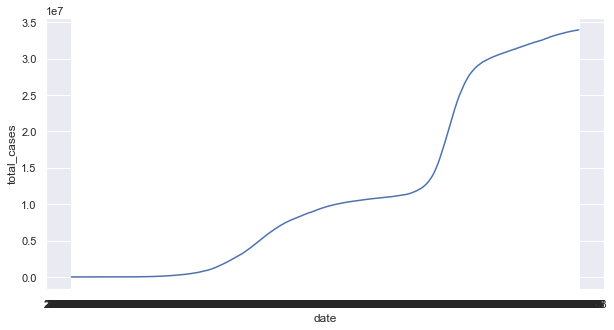

In [24]:
# Total cases per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = 'date' , y = 'total_cases' , data = india)
plt.show()

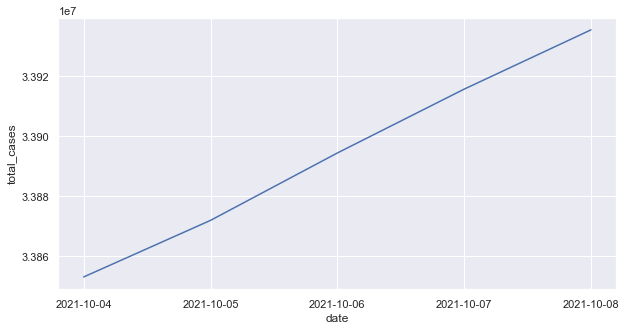

In [25]:
india_last_5_days = india.tail() # Total cases last 5 days
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "total_cases" , data = india_last_5_days)
plt.show()

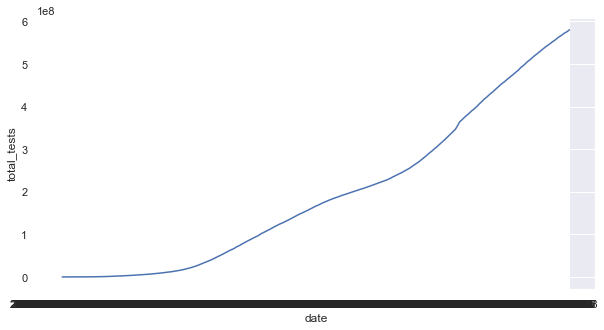

In [26]:
# Total Test per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "total_tests" , data = india)
plt.show()

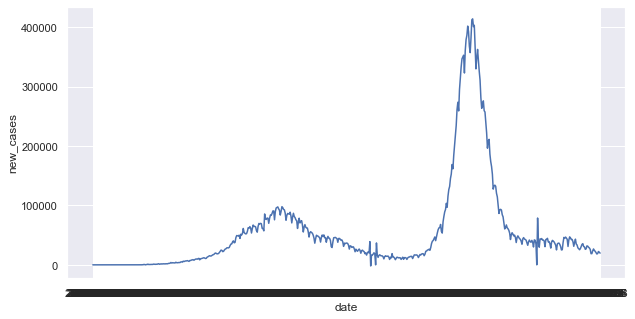

In [27]:
# New cases per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "new_cases" , data = india)
plt.show()

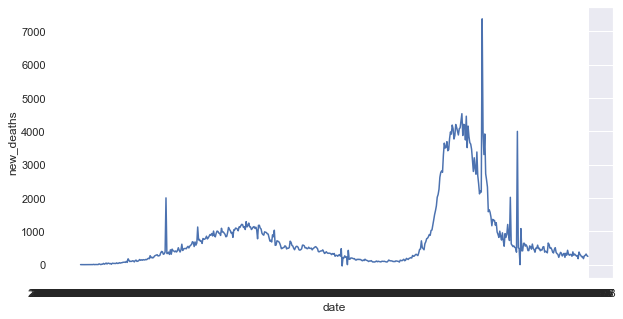

In [54]:
# New deaths per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "new_deaths" , data = india)
plt.show()

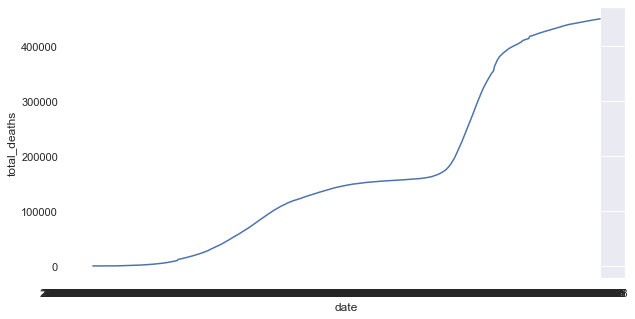

In [59]:
# New cases per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "total_deaths", data = india)
plt.show()

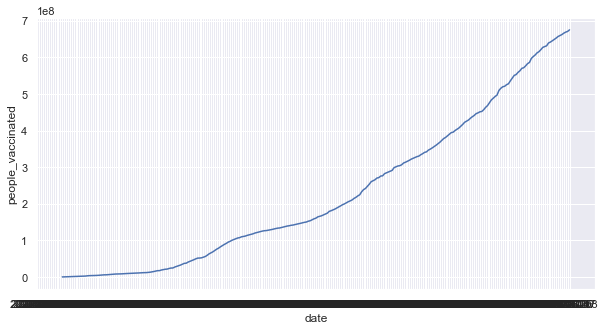

In [58]:
# New cases per day
sns.set(rc = {"figure.figsize" : (10,5)})
sns.lineplot(x = "date" , y = "people_vaccinated", data = india)
plt.show()

In [47]:
india.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [53]:
new=df[df['location']=='India'][['date','total_cases','new_cases',]]
new[:10]
# This is the top 10 info about total cases and new cases similarly you can other info also

,date,total_cases,new_cases
50549,2020-01-30,1.0,1.0
50550,2020-01-31,1.0,0.0
50551,2020-02-01,1.0,0.0
50552,2020-02-02,2.0,1.0
50553,2020-02-03,3.0,1.0
50554,2020-02-04,3.0,0.0
50555,2020-02-05,3.0,0.0
50556,2020-02-06,3.0,0.0
50557,2020-02-07,3.0,0.0
50558,2020-02-08,3.0,0.0


# Thank you